# Task 5 - protein expression and disease severity

In [58]:
import scanpy as sc
import muon as mu
import pandas as pd
import itertools
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multitest import fdrcorrection

pd.set_option('display.max_columns', 100)

In [14]:
mdata = mu.read('task5_input.h5mu')

In [15]:
adts = mdata.mod['prot'].var.index.tolist()

In [73]:
df = mdata.mod['prot'].obs.copy()

In [74]:
ct_list = (mdata.obs['annotation_merged'].value_counts() > 1000).index.tolist()

In [82]:
results = []
for ct in ct_list:
    for adt in adts:
    
        df = mdata.obs.query(f'annotation_merged == "{ct}"')
        x = df['fs_detailed'].astype(float)
        y = mdata.mod['prot'][ mdata.obs.query(f'annotation_merged == "{ct}"').index, adt].X.todense().A1
        valid = np.isfinite(x) & np.isfinite(y)
        if valid.sum() < 10:
            continue
        slope, inter, r, p, _, = stats.linregress(x[valid],y[valid])
        results.append((ct, adt, slope, p))

In [88]:
results_df = pd.DataFrame(results, columns=['ct', 'adt', 'slope', 'p'])

In [89]:
_, results_df['fdr'] = fdrcorrection(results_df['p'])

In [90]:
results_df.query('ct == "cDC"')

,ct,adt,slope,p,fdr
3336,cDC,CD86.1,0.055828,0.105817,0.292840
3337,cDC,CD274.1,-0.014206,0.790840,0.913648
3338,cDC,TNFRSF14.1,-0.114058,0.026199,0.106066
3339,cDC,PVR.1,0.010895,0.839733,0.932547
3340,cDC,NECTIN2.1,-0.088159,0.018692,0.083021
...,...,...,...,...,...
3470,cDC,CD101.1,0.143316,0.193988,0.425138
3471,cDC,C5AR1.1,-0.031913,0.371028,0.632078
3472,cDC,GGT1.2,-0.111896,0.099246,0.280685
3473,cDC,CCR7.1,-0.309201,0.000032,0.000301


In [95]:
results_df['log10p'] = -np.log10(results_df['p'])

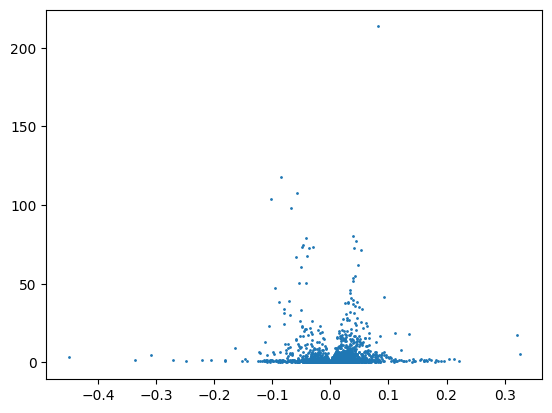

In [97]:
plt.scatter(results_df['slope'], results_df['log10p'], s=1)

In [99]:
results_df.query("fdr < 0.1").ct.value_counts()

ct
Classical Mono           76
EM CD4+ T                69
EM CD8+ T                64
Naive CD4+ T             64
Naive B                  57
Non classical Mono       56
Mem Treg                 50
Transitional B           47
Naive Treg               46
Memory B                 42
Cytotoxic CD57+ cells    40
Naive CD8+ T             38
CD56dim CD16bright NK    37
Gamma Delta T            36
CM CD4+ T                29
MZ B                     21
MonoDC                   20
MAIT                     19
Anergic CD4+ T           17
Proliferating CD8+ T     16
CD56bright CD16low NK    15
Intermediate Mono        11
pDC                      11
Plasma cells              7
cDC                       6
Stressed CD8+ T           5
HSPC                      3
Name: count, dtype: int64

In [135]:
results_df.query('fdr < 0.1').ct.value_counts()

ct
Classical Mono           76
EM CD4+ T                69
EM CD8+ T                64
Naive CD4+ T             64
Naive B                  57
Non classical Mono       56
Mem Treg                 50
Transitional B           47
Naive Treg               46
Memory B                 42
Cytotoxic CD57+ cells    40
Naive CD8+ T             38
CD56dim CD16bright NK    37
Gamma Delta T            36
CM CD4+ T                29
MZ B                     21
MonoDC                   20
MAIT                     19
Anergic CD4+ T           17
Proliferating CD8+ T     16
CD56bright CD16low NK    15
Intermediate Mono        11
pDC                      11
Plasma cells              7
cDC                       6
Stressed CD8+ T           5
HSPC                      3
Name: count, dtype: int64

In [137]:
results_df.query('ct == "CD4+" & fdr < 0.1').sort_values('slope')

,ct,adt,slope,p,fdr,log10p
1388,Non classical Mono,CCR7.1,-0.069892,1.021024e-30,8.330226e-29,29.990964
1351,Non classical Mono,ITGA2.1,-0.049742,1.504524e-10,3.208227e-09,9.822601
1385,Non classical Mono,CD101.1,-0.044309,8.486446e-12,2.003121e-10,11.071274
1272,Non classical Mono,ITGA6.1,-0.042029,2.306401e-04,1.873576e-03,3.637065
1348,Non classical Mono,CD226.1,-0.037229,1.395649e-07,2.137907e-06,6.855224
1389,Non classical Mono,CD138,-0.034278,6.461140e-23,3.730563e-21,22.189691
1312,Non classical Mono,THBD.1,-0.032228,6.574544e-11,1.451427e-09,10.182134
1340,Non classical Mono,FCER1A.1,-0.031143,6.961316e-19,3.110217e-17,18.157309
1380,Non classical Mono,humanIgLCL,-0.026651,2.721487e-05,2.639209e-04,4.565194
1330,Non classical Mono,GP1BB.1,-0.021557,3.098301e-07,4.506947e-06,6.508876


In [115]:
results_df.query('ct == "cDC" & fdr < 0.1').sort_values('slope')

,ct,adt,slope,p,fdr,log10p
3357,cDC,ITGA6.1,-0.450487,0.000513,0.003827,3.290008
3426,cDC,ITGA2B.1,-0.336046,0.019702,0.086483,1.705482
3473,cDC,CCR7.1,-0.309201,0.000032,0.000301,4.496990
3474,cDC,CD138,-0.110375,0.023375,0.098019,1.631246
3340,cDC,NECTIN2.1,-0.088159,0.018692,0.083021,1.728333
3382,cDC,ITGAE.1,0.103731,0.001431,0.009587,2.844509


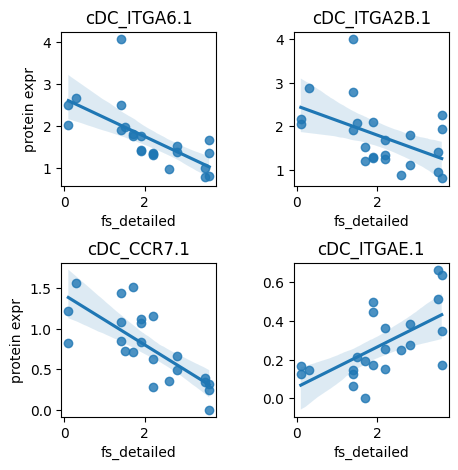

In [134]:
plt.figure(figsize=(5, 5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(2, 2, 1)
ct = 'cDC'
adt = 'ITGA6.1'

df = mdata.obs.query(f'annotation_merged == "{ct}"')
x = df['fs_detailed'].astype(float)
y = mdata.mod['prot'][ mdata.obs.query(f'annotation_merged == "{ct}"').index, adt].X.todense().A1
sns.regplot(x=x,y=y)
plt.title(f'{ct}_{adt}')
plt.ylabel('protein expr')

plt.subplot(2, 2, 2)
ct = 'cDC'
adt = 'ITGA2B.1'

df = mdata.obs.query(f'annotation_merged == "{ct}"')
x = df['fs_detailed'].astype(float)
y = mdata.mod['prot'][ mdata.obs.query(f'annotation_merged == "{ct}"').index, adt].X.todense().A1
sns.regplot(x=x,y=y)
plt.title(f'{ct}_{adt}')

plt.subplot(2, 2, 3)
ct = 'cDC'
adt = 'CCR7.1'

df = mdata.obs.query(f'annotation_merged == "{ct}"')
x = df['fs_detailed'].astype(float)
y = mdata.mod['prot'][ mdata.obs.query(f'annotation_merged == "{ct}"').index, adt].X.todense().A1
sns.regplot(x=x,y=y)
plt.title(f'{ct}_{adt}')
plt.ylabel('protein expr')


plt.subplot(2, 2, 4)
ct = 'cDC'
adt = 'ITGAE.1'

df = mdata.obs.query(f'annotation_merged == "{ct}"')
x = df['fs_detailed'].astype(float)
y = mdata.mod['prot'][ mdata.obs.query(f'annotation_merged == "{ct}"').index, adt].X.todense().A1
sns.regplot(x=x,y=y)
plt.title(f'{ct}_{adt}')

plt.savefig('cdc_protein_associations.png', bbox_inches='tight')

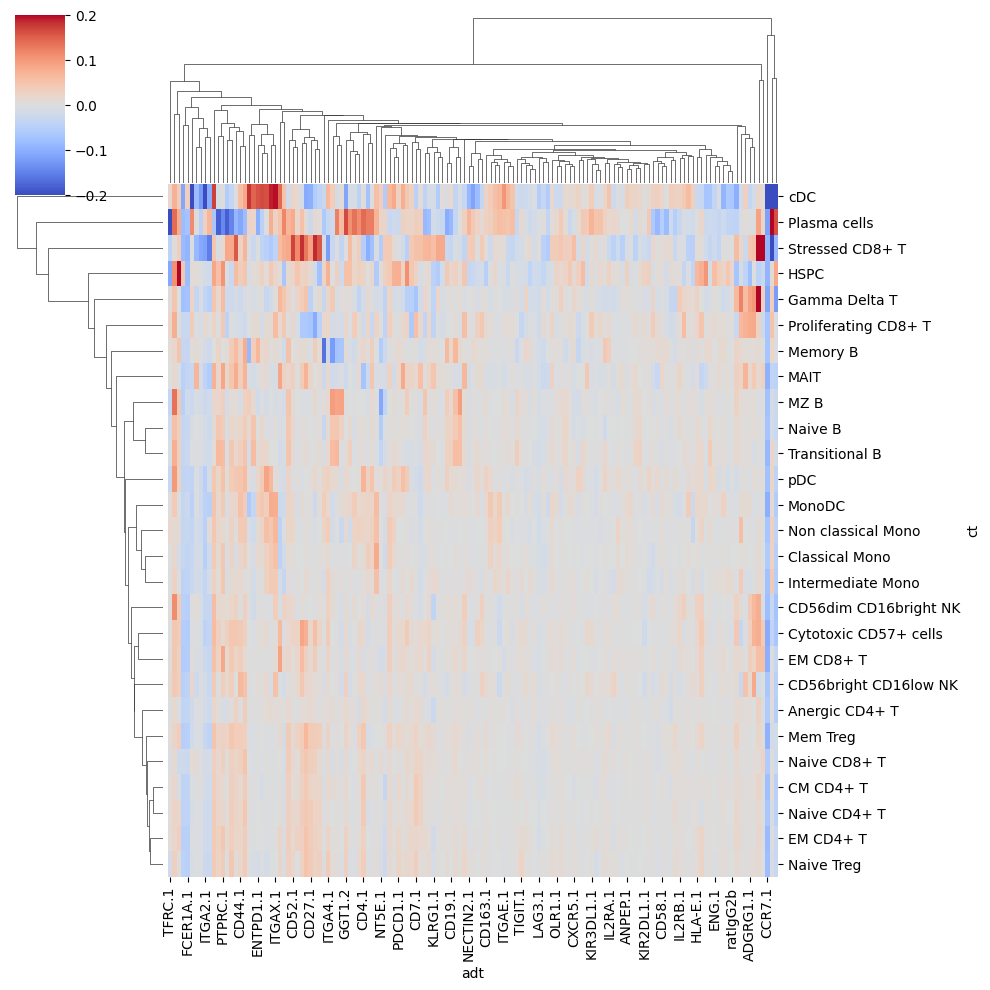

In [117]:
cg = sns.clustermap(results_df.pivot(index='ct', columns='adt', values='slope'), center=0, cmap='coolwarm', vmin=-0.2, vmax=0.2)
cg.savefig('protein_fs_correlations.png')

In [87]:
results_df.sort_values('slope').head(10)

,ct,adt,slope,p,fdr
3357,cDC,ITGA6.1,-0.450487,5.128517e-04,3.826506e-03
3426,cDC,ITGA2B.1,-0.336046,1.970233e-02,8.648284e-02
3473,cDC,CCR7.1,-0.309201,3.184272e-05,3.010220e-04
3723,Plasma cells,TFRC.1,-0.271111,1.573045e-02,7.249009e-02
3009,Stressed CD8+ T,ITGA2B.1,-0.248393,9.856589e-02,2.796648e-01
3436,cDC,ITGA2.1,-0.221663,3.053315e-02,1.198650e-01
3433,cDC,CD226.1,-0.204935,4.211576e-02,1.529659e-01
3630,Plasma cells,HLA-A.1,-0.181943,1.950445e-02,8.591573e-02
3669,Plasma cells,FAS.1,-0.181460,6.691704e-02,2.142830e-01
1454,Memory B,CR1.1,-0.164799,4.998210e-10,1.025043e-08


In [61]:
results_df.query('fdr < 0.1').ct.value_counts()

ct
Classical Mono           75
EM CD4+ T                69
Naive CD4+ T             64
EM CD8+ T                63
Naive B                  57
Non classical Mono       56
Mem Treg                 50
Naive Treg               46
Transitional B           45
Memory B                 42
Cytotoxic CD57+ cells    40
Naive CD8+ T             38
CD56dim CD16bright NK    37
Gamma Delta T            36
CM CD4+ T                28
MZ B                     20
MonoDC                   20
MAIT                     19
Anergic CD4+ T           16
CD56bright CD16low NK    15
Proliferating CD8+ T     15
Intermediate Mono        11
pDC                       9
Plasma cells              7
Proliferating CD4+ T      5
Stressed CD8+ T           5
cDC                       5
HSPC                      3
Name: count, dtype: int64

In [57]:
results_df

,ct,adt,slope,p
0,Classical Mono,CD86.1,0.007483,0.000004
1,Classical Mono,CD274.1,-0.002685,0.045845
2,Classical Mono,TNFRSF14.1,-0.005411,0.000065
3,Classical Mono,PVR.1,-0.006997,0.000003
4,Classical Mono,NECTIN2.1,0.003143,0.010983
...,...,...,...,...
3887,Plasma cells,CD101.1,0.050347,0.174634
3888,Plasma cells,C5AR1.1,0.004539,0.942706
3889,Plasma cells,GGT1.2,0.165191,0.036143
3890,Plasma cells,CCR7.1,-0.117450,0.129003


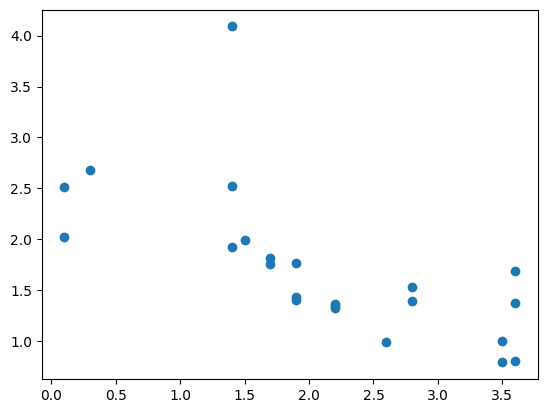

In [7]:
mdata.mod['prot'].obs

,orig.ident,nCount_RNA,nFeature_RNA,siccaid,pSS,ssa,annotation_merged,percent.mt,percent.ribo,PoolID,nCount_ADT,nFeature_ADT,age,sex,b_tobacco,ssb,fs,fs_detailed,b_lymphoma,b_systinvol,immune_meds,lympho,RNA.weight,ADT.weight,wsnn_res.2,seurat_clusters
GN21-SCG1_AAACCTGAGAACAACT-1,SICCA1-POOL-GN21-SCG1,5510.0,1610,10195200,0,0,Non classical Mono,5.080748,20.522591,GN21,1383.0,128.0,54,0,0,0,0,NaN,0,0,0,1.053,0.335633,0.664367,45,8
GN21-SCG1_AAACCTGAGAATGTGT-1,SICCA1-POOL-GN21-SCG1,2903.0,716,10200200,1,1,Anergic CD4+ T,2.721323,56.286598,GN21,773.0,120.0,58,0,0,0,0,0.3,0,1,0,1.562,0.999862,0.000138,23,3
GN21-SCG1_AAACCTGAGACCTAGG-1,SICCA1-POOL-GN21-SCG1,3738.0,933,10207300,0,0,Naive CD4+ T,2.247191,56.046013,GN21,748.0,121.0,35,0,0,0,1,2.2,0,0,1,1.728,0.956924,0.043076,3,11
GN21-SCG1_AAACCTGAGGGTCGAT-1,SICCA1-POOL-GN21-SCG1,3904.0,1365,10208900,0,0,EM CD4+ T,2.944942,37.413574,GN21,995.0,120.0,60,0,-2147483648,0,0,0.1,0,0,0,1.600,0.571044,0.428956,9,17
GN21-SCG1_AAACCTGAGTACTTGC-1,SICCA1-POOL-GN21-SCG1,3694.0,1447,10195200,0,0,Classical Mono,6.248310,17.311333,GN21,3622.0,137.0,54,0,0,0,0,NaN,0,0,0,1.053,0.802886,0.197114,22,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GN27-SCG1_TTTGTCATCAGCATGT-1,SICCA1-POOL-GN27-SCG1,4070.0,1282,10209900,1,1,Naive CD8+ T,2.751167,39.449768,GN27,3630.0,133.0,51,0,0,1,1,5.7,0,0,0,1.476,0.002027,0.997973,8,16
GN27-SCG1_TTTGTCATCCTAGGGC-1,SICCA1-POOL-GN27-SCG1,3041.0,1093,10108000,1,1,Memory B,3.024326,36.554897,GN27,1252.0,131.0,56,0,0,1,1,2.3,0,0,1,2.100,0.596086,0.403914,15,22
GN27-SCG1_TTTGTCATCGGCATCG-1,SICCA1-POOL-GN27-SCG1,8059.0,2340,10106800,1,0,Non classical Mono,2.232974,19.947897,GN27,4208.0,136.0,60,0,1,0,1,2.8,0,0,0,1.500,0.383394,0.616606,45,8
GN27-SCG1_TTTGTCATCTAACGGT-1,SICCA1-POOL-GN27-SCG1,3931.0,1317,10108100,1,1,Transitional B,2.945658,32.656170,GN27,2965.0,134.0,44,1,0,1,1,5.3,0,1,0,0.900,0.445452,0.554548,13,20
